In [72]:
import mne
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [73]:
recording_path = 'recordings/recording_ssvep4_gel.raw.fif'

In [74]:
raw = mne.io.read_raw_fif(recording_path, preload=True).rescale(1e-6)
raw.info = mne.create_info(ch_names=raw.ch_names, sfreq=raw.info['sfreq'], ch_types='eeg')
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, Pz, PO7, Oz, PO8
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

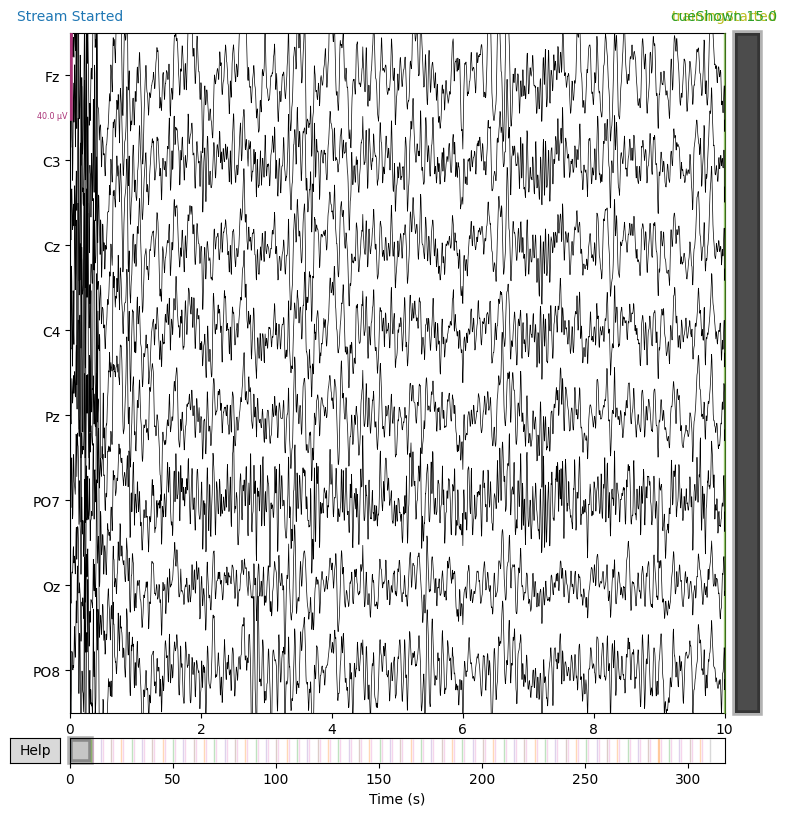

In [75]:
raw.plot()
plt.show()

In [76]:
raw.annotations.description, raw.annotations.onset

(array(['Stream Started', 'trainingStarted', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', 'cueShown 19.0', 'stimulusShown', 'cueShown 23.0',
        'stimulusShown', 'cueShown 11.0', 'stimulusShown', 'cueShown 15.0',
        'stimulusShown', '

In [77]:
label_onsets = defaultdict(list)
current_cue = None
stimulus_duration = None

# Calculate stimulus presentation time assuming all are equal
for i in range(len(raw.annotations) - 1):
    if raw.annotations[i]['description'].startswith('stimulus'):
        assert raw.annotations[i + 1]['description'].startswith('cue')
        # Calculate the duration of the stimulus presentation
        stimulus_duration = int(raw.annotations[i + 1]['onset'] - raw.annotations[i]['onset'])
        break

print(stimulus_duration)

for annotation in raw.annotations:
    if annotation['description'].startswith('cue'):
        current_cue = annotation['description'].split(' ')[1]
    elif annotation['description'].startswith('stimulus'):
        current_onset = annotation['onset']
        # We must already have a cue (every stimulus follows a cue)
        label_onsets[current_cue].append(current_onset)

label_onsets

4


defaultdict(list,
            {'15.0': [np.float64(10.92731),
              np.float64(30.964291),
              np.float64(51.030697),
              np.float64(71.097176),
              np.float64(91.19252),
              np.float64(111.219849),
              np.float64(131.274994),
              np.float64(151.346252),
              np.float64(171.385941),
              np.float64(191.457642),
              np.float64(211.505066),
              np.float64(231.576675),
              np.float64(251.64801),
              np.float64(271.703674),
              np.float64(291.727661)],
             '19.0': [np.float64(15.925606),
              np.float64(35.993656),
              np.float64(56.044086),
              np.float64(76.09874),
              np.float64(96.157776),
              np.float64(116.253281),
              np.float64(136.260452),
              np.float64(156.335541),
              np.float64(176.407562),
              np.float64(196.475113),
              np.float64(216.

In [78]:
# For each label, crop the raw data
def crop_raw_data(raw, label_onsets, stimulus_duration):
    cropped_data = {}
    for label, onsets in label_onsets.items():
        cropped_data[label] = []
        for onset in onsets:
            end = onset + stimulus_duration
            cropped_data[label].append(raw.copy().crop(onset, end))
    return cropped_data
cropped = crop_raw_data(raw, label_onsets, stimulus_duration)
cropped

{'15.0': [<Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.ra

In [79]:
def filter_cropped_data(cropped, l_freq=None, h_freq=None):
    filtered_data = {}
    for label, raw_list in cropped.items():
        filtered_data[label] = []
        for raw in raw_list:
            filtered = raw.copy().filter(l_freq, h_freq)
            filtered_data[label].append(filtered)
    return filtered_data
filtered = filter_cropped_data(cropped, l_freq=8, h_freq=30)
filtered

{'15.0': [<Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.raw.fif, 8 x 1001 (4.0 s), ~75 KiB, data loaded>,
  <Raw | recording_ssvep4_gel.ra

In [80]:
def epoch_filtered_data(filtered, window_size, window_overlap):
    epochs_data = {}
    for label, raw_list in filtered.items():
        epochs_data[label] = []
        for raw in raw_list:
            # Create epochs with the specified window size and overlap
            epochs = mne.make_fixed_length_epochs(raw, duration=window_size, overlap=window_overlap, preload=True)
            epochs_data[label].append(epochs)
    return epochs_data
epochs = epoch_filtered_data(filtered, window_size=2, window_overlap=0.5)
epochs

{'15.0': [<Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996 s (baseline off), ~75 KiB, data loaded,
   '1': 2>,
  <Epochs | 2 events (all good), 0 – 1.996

In [81]:
def convert_epochs_to_array(epochs):
    data_arrays = {}
    for label, epochs_list in epochs.items():
        data_arrays[label] = []
        for raw in epochs_list:
            # Convert epochs to numpy array
            data_arrays[label].append(raw.get_data())
        # Convert to numpy array
        data_arrays[label] = np.concatenate(data_arrays[label], axis=0)
    return data_arrays
data_arrays = convert_epochs_to_array(epochs)
data_arrays['15.0']

array([[[-4.53294976e-22, -7.06164634e-07, -2.03284048e-06, ...,
          4.45304981e-06,  8.08264263e-06,  1.12778150e-05],
        [-3.18299100e-21, -3.93674878e-07, -1.07655956e-06, ...,
          1.90257513e-06,  7.20579611e-06,  1.15200509e-05],
        [-1.45914660e-21, -6.63598939e-07, -1.84796911e-06, ...,
          1.18433151e-06,  6.98124508e-06,  1.23740795e-05],
        ...,
        [-4.00272698e-21, -5.75495279e-08, -1.58838236e-07, ...,
          6.62203642e-07,  4.77516477e-06,  7.75232431e-06],
        [-1.17128775e-21,  7.61473145e-08, -1.33623006e-07, ...,
         -8.55688027e-07,  1.73385112e-06,  3.91951339e-06],
        [-1.56171700e-21,  1.22207757e-06,  1.28151151e-06, ...,
          2.17318745e-06,  6.36864159e-06,  9.31198554e-06]],

       [[ 5.64568449e-06,  4.38955087e-06,  1.77463986e-06, ...,
         -9.08758855e-06, -1.31881595e-05, -1.42216888e-05],
        [ 7.81660443e-06,  3.78262660e-06, -2.03240052e-06, ...,
         -8.84823237e-06, -1.16688268e

In [82]:
data_arrays['15.0'][0]

array([[-4.53294976e-22, -7.06164634e-07, -2.03284048e-06, ...,
         4.45304981e-06,  8.08264263e-06,  1.12778150e-05],
       [-3.18299100e-21, -3.93674878e-07, -1.07655956e-06, ...,
         1.90257513e-06,  7.20579611e-06,  1.15200509e-05],
       [-1.45914660e-21, -6.63598939e-07, -1.84796911e-06, ...,
         1.18433151e-06,  6.98124508e-06,  1.23740795e-05],
       ...,
       [-4.00272698e-21, -5.75495279e-08, -1.58838236e-07, ...,
         6.62203642e-07,  4.77516477e-06,  7.75232431e-06],
       [-1.17128775e-21,  7.61473145e-08, -1.33623006e-07, ...,
        -8.55688027e-07,  1.73385112e-06,  3.91951339e-06],
       [-1.56171700e-21,  1.22207757e-06,  1.28151151e-06, ...,
         2.17318745e-06,  6.36864159e-06,  9.31198554e-06]],
      shape=(8, 500))